## 2.2 PyTorch第一步

PyTorch的简洁设计使得它入门很简单，在深入介绍PyTorch之前，本节将先介绍一些PyTorch的基础知识，使得读者能够对PyTorch有一个大致的了解，并能够用PyTorch搭建一个简单的神经网络。部分内容读者可能暂时不太理解，可先不予以深究，本书的第3章和第4章将会对此进行深入讲解。

本节内容参考了PyTorch官方教程[^1]并做了相应的增删修改，使得内容更贴合新版本的PyTorch接口，同时也更适合新手快速入门。另外本书需要读者先掌握基础的Numpy使用，其他相关知识推荐读者参考CS231n的教程[^2]。

[^1]: http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
[^2]: http://cs231n.github.io/python-numpy-tutorial/

### Tensor

Tensor是PyTorch中重要的数据结构，可认为是一个「高维数组」。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。Tensor和Numpy的ndarrays类似，但Tensor可以**使用GPU进行加速**。Tensor的使用和Numpy及Matlab的接口十分相似，下面通过几个例子来看看Tensor的基本使用。

In [1]:
from __future__ import print_function
import torch as t

In [2]:
# 构建 5x3 矩阵，只是分配了空间，未初始化
x = t.Tensor(5, 3)  
print(x.dtype)

torch.float32


In [3]:
# 使用[0,1]均匀分布随机初始化二维数组
x = t.rand(5, 3)
x

tensor([[0.9094, 0.0841, 0.1527],
        [0.7387, 0.8319, 0.9492],
        [0.3260, 0.2703, 0.7625],
        [0.3572, 0.8509, 0.3421],
        [0.9637, 0.7739, 0.7085]])

In [4]:
print(x.size()) # 查看x的形状，数据类型为torch.Size类型的数据结构
print(type(x.size()))
x.size()[1], x.size(1) # 查看列的个数, 两种写法等价 

torch.Size([5, 3])
<class 'torch.Size'>


(3, 3)

`torch.Size` 是tuple对象的子类，因此它支持tuple的所有操作，如x.size()[0]

In [5]:
y = t.rand(5, 3)
# 加法的第一种写法，直接采用数字加得形式进行处理「重载运算符」，原始数据未发生改变
x + y

tensor([[1.0432, 0.3739, 1.0432],
        [1.5281, 1.4625, 1.2640],
        [1.2047, 0.6155, 1.0201],
        [1.1200, 1.0266, 0.7491],
        [1.4485, 1.3572, 1.5538]])

In [6]:
# 加法的第二种写法，以类函数的形式进行调用
t.add(x, y)

tensor([[1.0432, 0.3739, 1.0432],
        [1.5281, 1.4625, 1.2640],
        [1.2047, 0.6155, 1.0201],
        [1.1200, 1.0266, 0.7491],
        [1.4485, 1.3572, 1.5538]])

In [7]:
# 加法的第三种写法：指定加法结果的输出目标为result，函数重载或者为参数默认值
result = t.Tensor(5, 3) # 预先分配空间
t.add(x, y, out=result) # 输入到result
result

tensor([[1.0432, 0.3739, 1.0432],
        [1.5281, 1.4625, 1.2640],
        [1.2047, 0.6155, 1.0201],
        [1.1200, 1.0266, 0.7491],
        [1.4485, 1.3572, 1.5538]])

In [8]:
print('最初y')
print(y)

print('第一种加法，y的结果')
y.add(x) # 普通加法，不改变y的内容
print(y)

print('第二种加法，y的结果')
y.add_(x) # inplace 加法，y变了：因为采用了内部的加，注意下划线，此时y发生了改变
print(y)

最初y
tensor([[0.1338, 0.2898, 0.8904],
        [0.7895, 0.6307, 0.3148],
        [0.8787, 0.3451, 0.2576],
        [0.7628, 0.1756, 0.4070],
        [0.4848, 0.5833, 0.8453]])
第一种加法，y的结果
tensor([[0.1338, 0.2898, 0.8904],
        [0.7895, 0.6307, 0.3148],
        [0.8787, 0.3451, 0.2576],
        [0.7628, 0.1756, 0.4070],
        [0.4848, 0.5833, 0.8453]])
第二种加法，y的结果
tensor([[1.0432, 0.3739, 1.0432],
        [1.5281, 1.4625, 1.2640],
        [1.2047, 0.6155, 1.0201],
        [1.1200, 1.0266, 0.7491],
        [1.4485, 1.3572, 1.5538]])


注意，「**`inplace操作`**」函数名后面带下划线t.add**`_`** 的函数会修改Tensor本身。例如，`x.add_(y)`和`x.t_()`会改变 `x`，但`x.add(y)`和`x.t()`返回一个新的Tensor， 而`x`不变。

In [9]:
print(x)
# Tensor的选取操作与Numpy类似
x[:, 1] # 选取x 行：所有；列：第一列

tensor([[0.9094, 0.0841, 0.1527],
        [0.7387, 0.8319, 0.9492],
        [0.3260, 0.2703, 0.7625],
        [0.3572, 0.8509, 0.3421],
        [0.9637, 0.7739, 0.7085]])


tensor([0.0841, 0.8319, 0.2703, 0.8509, 0.7739])

Tensor还支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与**Numpy**极为相似。更详细的使用方法，会在第三章系统讲解。

**相互转化：**Tensor和Numpy的数组之间的`互操作`非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor。

**注意：**Tensor和Numpy对象共享内存，相互转化十分快速；

In [10]:
a = t.ones(5) # 新建一个全1的Tensor
print(type(a))
a

<class 'torch.Tensor'>


tensor([1., 1., 1., 1., 1.])

In [11]:
b = a.numpy() # Tensor -> Numpy，调用torch成员函数「numpy」，返回numpy对象:numpy.ndarray
print(type(b))
b

<class 'numpy.ndarray'>


array([1., 1., 1., 1., 1.], dtype=float32)

In [12]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a) # Numpy-> Tensor : 使用torch成员函数「from_numpy」转化numpy.ndarray对象为torch对象
print(a)
print(b) 

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Tensor和numpy对象**共享内存**，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变。

In [13]:
print('a type is : {}, b type is : {}'.format(type(a),type(b)))
b.add_(1) # 以`_`结尾的函数会修改自身
print(a)
print(b) # Tensor和Numpy共享内存

a type is : <class 'numpy.ndarray'>, b type is : <class 'torch.Tensor'>
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Tensor可通过`.cuda` 方法转为**GPU的Tensor**，从而享受GPU带来的加速运算。

In [14]:
# 判断机器是否支持CUDA操作，换言之是否存在显卡及驱动
print(t.cuda.is_available())

True


In [15]:
# 在不支持CUDA的机器下，下一步不会运行
if t.cuda.is_available():
    x = x.cuda() # x转化为GPU的Tensor
    y = y.cuda()
    print(type(x))
    print(x + y)
    print('cuda has acculmulate')

<class 'torch.Tensor'>
tensor([[1.9527, 0.4580, 1.1959],
        [2.2668, 2.2944, 2.2132],
        [1.5307, 0.8858, 1.7827],
        [1.4772, 1.8775, 1.0912],
        [2.4121, 2.1312, 2.2623]], device='cuda:0')
cuda has acculmulate


此处可能发现GPU运算的速度并未提升太多，这是因为x和y太小且运算也较为简单，而且将数据从**内存**转移到**显存**还需要花费额外的开销。GPU的优势需在大规模数据和复杂运算下才能体现出来。

### Autograd: 自动微分

深度学习的算法**本质**上是通过反向传播求导数，而PyTorch的**`Autograd`**模块则实现了此功能。在Tensor上的所有操作，Autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。
 
`autograd.Variable`是Autograd中的核心类，它简单**封装了Tensor**，并支持几乎所有Tensor有的操作。Tensor在被封装为Variable之后，可以调用它的`.backward`实现反向传播，自动计算所有梯度。Variable的数据结构如图2-6所示。


![图2-6:Variable的数据结构](imgs/autograd_Variable.svg)


Variable主要包含三个属性。
- **`data`**：保存Variable所包含的Tensor
- **`grad`**：保存`data`对应的**梯度**，`grad`也是个Variable，而不是Tensor，它和`data`的形状一样。
- **`grad_fn`**：指向一个`Function`对象，这个`Function`用来反向传播计算输入的梯度，具体细节会在下一章讲解。

In [16]:
from torch.autograd import Variable

In [17]:
# 使用Tensor新建一个Variable
x = Variable(t.ones(2, 2), requires_grad = True)
print(type(x))
y = x.data.numpy()
print(x)
print('Variable data convert to numpy: '.format(y))
y

<class 'torch.Tensor'>
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
Variable data convert to numpy: 


array([[1., 1.],
       [1., 1.]], dtype=float32)

In [18]:
y = x.sum() # x 为torch.Variable变量，此函数含义为，设置y对象的grad_fn为 「sum」函数
print(type(y))
print(y.grad_fn)
y           # y等于：tensor(4., grad_fn=<SumBackward0>)

<class 'torch.Tensor'>


tensor(4., grad_fn=<SumBackward0>)

In [19]:
y.grad_fn # 此值的赋值为： y = x.sum()

In [20]:
y.backward() # 函数调用：反向传播,计算梯度  调用Variable变量y的.backward实现反向传播，自动计算所有梯度

In [21]:
# 如上所述：Variable变量中的：
# data：存储数据
# grad_fn: 存储应用在自变量的函数，用于后面计算梯度 「存储在因变量中的此属性中」
# grad：则存储计算出的梯度值
print(x.grad_fn,x.grad)

None tensor([[1., 1.],
        [1., 1.]])


In [22]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad 

tensor([[1., 1.],
        [1., 1.]])

注意：`grad`在反向传播过程中是**累加**的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [23]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [24]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [25]:
# 以下划线结束的函数是inplace操作，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [26]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

Variable和Tensor具有近乎一致的接口，在实际使用中可以**无缝切换**。不需要进行转化即可进行计算

In [27]:
x = Variable(t.ones(4,5))  # Variable 变量构建中， 构造函数传入参数为 torch.Tensor变量
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
x_tensor_cos

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])


tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

###  神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，**`torch.nn`**是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。**nn.Module**是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用`nn.Module`实现。LeNet的网络结构如图2-7所示。

![图2-7:LeNet网络结构](imgs/nn_lenet.png)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

1. 继承 nn.Module 模块；
2. 实现对应forward方法；
3. 将具有可学习参数的层，放置到`__init__`构造函数中；
4. 不具有可学习参数的层，则在forward中使用 `nn.functional`代替；
5. 网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称(net为定义网络的实例）。


定义网络时，需要**继承**`nn.Module`，并**实现**它的forward方法，把网络中**具有可学习参数的层**放在构造函数`__init__`中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

In [28]:
import pdb
import torch.nn as nn
import torch.nn.functional as F # 不具有 「可学习参数」的层，如池化层、激活函数，则在 「forward函数中」使用 nn.functional替代

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于 nn.Module.__init__(self) :调用nn.Module的构造函数
        super(Net, self).__init__()
        
        # 卷积层  '1' 表示输入图片为单通道， '6' 表示输出通道数， '5' 表示卷积核 为 5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层/ 全连接层 ， y = Wx+b
        self.fc1 = nn.Linear(16*5*5, 120) # 输入为 16*5*5 = 400， 输出为 120
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # pdb.set_trace()
        # 卷积 -> 激活 -> 池化 # 假设输入为 [1, 1, 32, 32], 感受野计算公式 ： (图像size - 卷积核size + 2 * padding)/ stride + 1
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  # (14 * 14) * 6
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)       # (5* 5) * 16
        # reshape, '-1':表示自适应
        x = x.view(x.size()[0], -1)  # 全卷积层 需要将图像进行拉伸为 一列;
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在**nn.Module的子类**中定义了forward函数，backward函数就会**自动被实现**(利用`Autograd`)。在`forward` 函数中可使用任何Variable支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [29]:
params = net.parameters()
print(params)
params = list(net.parameters())
print(len(params))

<generator object Module.parameters at 0x7ffbd4285390>
10


In [30]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [31]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Variable，只有Variable才具有自动求导功能，而Tensor是没有的，所以在输入时，需把Tensor封装成Variable。

### Tensor和Variable的合并
说是合并, 其实是按照以前(0.1-0.3版本)的观点是:**Tensor现在默认requires_grad=False的Variable了**. torch.Tensor和torch.autograd.Variable现在其实是同一个类! 没有本质的区别! 

换言之，现在已经没有纯粹的Tensor了, 是个Tensor, 它就支持自动求导! 

#### 注意：
- 此前,Variable.data 属性：为了拿到Variable对象中的tensor。后期版本中，因为两者合并，所以「**`.data`**」返回一个**新的 requires_grad = True 的Tensor，且这个tensor于之前那个Tensor共享内存

In [32]:
# 打印当前pytorch的版本
print(t.__version__)

0.4.1.post2


##### 查看Tensor的类型


In [33]:
# 使用.isinstance()或是x.type(), 用type()不能看tensor的具体类型
x = t.DoubleTensor([1, 1, 1])
print(type(x)) # 不能查看tensor的具体类型
# 查看具体类型
print(x.type()) # 调用torch.Tensor对象的成员函数
print(isinstance(x, t.FloatTensor)) # 查看是否为torch.FloatTensor类型
x = t.rand(2,3)
print(x.type()) # was torch.FloatTensor
# tensor 和 Variable的合并，requires_grad 已经成为Tensor的一个属性；
print(x.requires_grad)  # 默认为false

# 将 `requires_grad` 作为一个参数，构造tensor
w = t.ones(1, requires_grad = True)
z = t.ones(1)
print('the tensor requires is : ', w.requires_grad)
print('the tensor z is : ', z.requires_grad)
total = t.add(z,w)
print('the sum tensor grad is : ',total.requires_grad)

<class 'torch.Tensor'>
torch.DoubleTensor
False
torch.FloatTensor
False
the tensor requires is :  True
the tensor z is :  False
the sum tensor grad is :  True


In [34]:
import torch
input = t.randn(1,1,32, 32, dtype=torch.float32) # nn.Conv2d 输入必须是4维的，形如 nSamples×nChannels×Height×Width 
print ('input size is : ', input.size())
print('input type is : ', input.type()) # was torch.FloatTensor
output = net(input)
output.size()

input size is :  torch.Size([1, 1, 32, 32])
input type is :  torch.FloatTensor


torch.Size([1, 10])

In [35]:
net.zero_grad() # 所有参数的梯度清零
output.backward(t.ones(1,10)) # 反向传播
# out.backward(Variable(t.ones(1,10))) # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [36]:
output = net(input)
target = t.arange(0, 10, dtype = t.float32)
target = target.view(-1, output.size()[1])
print('targe is : ', target.type())
print('output is : ', output.type())
criterion = nn.MSELoss()
loss = criterion(output, target)
loss


targe is :  torch.FloatTensor
output is :  torch.FloatTensor


tensor(28.5087, grad_fn=<MseLossBackward>)

如果对loss进行反向传播溯源(使用`gradfn`属性)，可看到它的计算图如下：

```
input -> (conv2d -> relu -> maxpool2d) -> (conv2d -> relu -> maxpool2d)  
      -> view -> (linear -> relu) -> (linear -> relu) -> (linear) 
      -> MSELoss
      -> loss
```

当调用`loss.backward()`时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [37]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([-0.0490,  0.0829,  0.0852, -0.0242, -0.0952,  0.0121])


#### 优化器

在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```

手动实现如下：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```

`torch.optim`中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [38]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()



####  数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

`torchvision`实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下: 

1. **数据：**使用`torchvision`**加载**并**预处理**CIFAR-10数据集
2. **网络：**定义网络
3. **损失函数和优化器：**定义损失函数和优化器
4. **训练及更新：**训练网络并更新网络参数
5. **验证：**测试网络

####   CIFAR-10数据加载及预处理

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [42]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [43]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='~/Append/0_personLearn/5_tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    root='~/Append/0_personLearn/5_tmp/data/', 
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**Dataset对象(trainset、testset)**是一个数据集，可以按下标访问，返回形如(data, label)的数据。

In [53]:
(data, label) = trainset[100]
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


ship


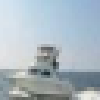

In [65]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader是一个**可迭代的对象**，它将dataset返回的每一条数据拼接成一个batch（上述定义中，已将batch_size = 4），并提供**多线程加速优化和数据打乱**等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

       frog       horse         car        bird


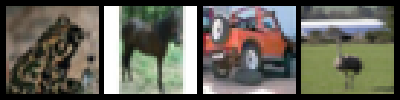

In [68]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

####   定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [69]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


####  定义损失函数和优化器(loss和optimizer)

In [70]:
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###   训练网络

所有网络的训练流程都是类似的，不断地执行如下流程：

- 输入数据
- 前向传播+反向传播
- 更新参数


In [1]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 输入数据
        inputs, labels = data
        # inputs, labels = Variable(inputs), Variable(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        #running_loss += loss.data[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

NameError: name 't' is not defined

此处仅训练了2个epoch（**遍历完一遍数据集**称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:       cat     ship     ship    plane


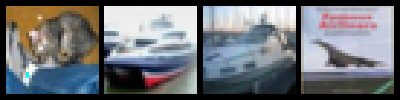

In [80]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))


接着计算网络预测的label：

In [ ]:
# 计算图片在每个类别上的分数
outputs = net(Variable(images))
# 得分最高的那个类
# _, predicted = t.max(outputs.data, 1)
import pdb
pdb.set_trace()
_, predicted = t.max(outputs, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = t.max(output, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

In [ ]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

####  在GPU训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [ ]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss= criterion(output,Variable(labels))

如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。

对PyTorch的基础介绍至此结束。总结一下，本节主要包含以下内容。

1. Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
2. autograd/Variable: Variable封装了Tensor，并提供自动求导功能。
3. nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
4. 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。

通过本节的学习，相信读者可以体会出PyTorch具有接口简单、使用灵活等特点。从下一章开始，本书将深入系统地讲解PyTorch的各部分知识。

**pytorch 0.4.1.post2版本CIFAR-10 代码**

In [2]:
# -*- coding: utf-8 -*-
# @Author: Lishi
# @Date:   2018-06-17 09:51:56
# @Last Modified by:   zhanglishi001
# @Last Modified time: 2018-06-26 12:09:24

import torch as t
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化
import pdb

# torch.device object used throughout this script
use_cuda = torch.cuda.is_available() 
device = torch.device("cuda" if use_cuda else "cpu")


import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    """LeNet网络，修改 self.conv1第一个参数为3通道"""
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x


def main():
    # 第一次运行程序torchvision会自动下载CIFAR-10数据集
    # 大约100M，需花费一定的时间，
    # 如果已经下载有CIFAR-10，可通过root参数指定

    # 定义对数据的预处理
    transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])
    # 训练集
    trainset = tv.datasets.CIFAR10(
                    root='~/Append/0_personLearn/5_tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

    trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

    # 测试集
    testset = tv.datasets.CIFAR10(
                    root='~/Append/0_personLearn/5_tmp/data/', 
                    train=False, 
                    download=True, 
                    transform=transform)

    testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    net = Net().to(device)
    print(net)

    # 定义损失函数和优化器(loss和optimizer)
    from torch import optim
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

    thread_nums = 8
    epoch_nums = 15
    t.set_num_threads(8)
    for epoch in range(epoch_nums):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # 输入数据
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            # 梯度清零
            optimizer.zero_grad()

            # forward + backward
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()

            # 更新参数
            optimizer.step()

            # 打印log信息
            #running_loss += loss.data[0]
            running_loss += loss.item()
            if i % 2000 == 1999: # 每2000个batch打印一下训练状态
                print('[%d, %5d] loss: %.3f' \
                      % (epoch+1, i+1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')

    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))



if __name__ == '__main__':
    main()

Files already downloaded and verified
Files already downloaded and verified
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
[1,  2000] loss: 2.205
[1,  4000] loss: 1.895
[1,  6000] loss: 1.697
[1,  8000] loss: 1.598
[1, 10000] loss: 1.540
[1, 12000] loss: 1.493
[2,  2000] loss: 1.437
[2,  4000] loss: 1.397
[2,  6000] loss: 1.375
[2,  8000] loss: 1.343
[2, 10000] loss: 1.288
[2, 12000] loss: 1.306
[3,  2000] loss: 1.218
[3,  4000] loss: 1.230
[3,  6000] loss: 1.240
[3,  8000] loss: 1.233
[3, 10000] loss: 1.178
[3, 12000] loss: 1.202
[4,  2000] loss: 1.125
[4,  4000] loss: 1.123
[4,  6000] loss: 1.124
[4,  8000] loss: 1.140
[4, 10000] loss: 1.110
[4, 12000] loss: 1.137
[5,  2000] loss: 0.999
[5,  4000] loss: 1.058
[5,  6000] loss: 

epoch = 10:10000张测试集中的准确率为: 63 %

epoch = 15:10000张测试集中的准确率为: 62 %

epoch = 20:10000张测试集中的准确率为: 61 %